<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/DesicionAnalysis/TallerFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR LIBRERÍAS
import numpy as np
import pandas as pd
# !pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# Extraccion datos


In [ ]:
tickers = ['AAPL', 'GOOGL', 'META', 'BABA','F','DIS']
datos = pd.DataFrame()
datosEmpresas = {} 
for t in tickers:
    datos[t] = yf.download(t, start = '2019-01-01')['Adj Close']
    datosEmpresas[t] = {}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Rendimiento promedio anual

## Retorno Simple


In [ ]:
serieRetornos = (datos/datos.shift(1))-1

for t in tickers:
  datosEmpresas[t]['retornoS']=serieRetornos[t].mean() * 250

In [ ]:
maxRetorno=('',float('-inf'))
for t in tickers:
  value=datosEmpresas[t]['retornoS']
  print(f'el retorno de la acción {t} es {(value)*100}%')
  if value>maxRetorno[1]:
    maxRetorno=(t,value)
maxName=maxRetorno[0]
maxValue=maxRetorno[1]
print()
print(f'el maximo retorno es el de la accion {maxName}, con un rendimiento de {(maxValue)*100}%')

el retorno de la acción AAPL es 46.348547706278474%
el retorno de la acción GOOGL es 27.020317997722458%
el retorno de la acción META es 14.632682419644116%
el retorno de la acción BABA es 0.9038870254076915%
el retorno de la acción F es 30.930393616290047%
el retorno de la acción DIS es 5.485995013465448%

el maximo retorno es el de la accion AAPL, con un rendimiento de 46.348547706278474%


## Retorno logaritmico


In [ ]:
retornoLogaritmico = np.log(datos/datos.shift(1))
for t in tickers:
  datosEmpresas[t]['retornoL']=retornoLogaritmico[t].mean() * 250

# Portafolios


In [ ]:
labelPortafolio=['escenario1','escenario2','escenario3','escenario4','escenario5']

portafolio={}
for p in labelPortafolio:
  portafolio[p]={}

portafolio[labelPortafolio[0]]['peso']=np.array([0.2 , 0.2 , 0.1 , 0.1 , 0.2, 0.2 ])
portafolio[labelPortafolio[1]]['peso']=np.array([0   , 0.5 , 0.05, 0.3 , 0  , 0.15])
portafolio[labelPortafolio[2]]['peso']=np.array([0.3 , 0.6 , 0   , 0.1 , 0  , 0   ])
portafolio[labelPortafolio[3]]['peso']=np.array([0.15, 0.15, 0.15, 0.15,0.2 , 0.2 ])
portafolio[labelPortafolio[4]]['peso']=np.array([0.5 , 0   , 0   , 0   ,0.5 , 0   ])

## Retorno anual promedio

In [ ]:
#Rendimiento
for p in labelPortafolio:
  portafolio[p]['retorno']=np.dot((serieRetornos.mean()*250),  portafolio[p]['peso'])

In [ ]:
for p in labelPortafolio:
  value=portafolio[p]['retorno']
  print(f'el retorno del portafolio {p} es de {(value)*100}%')

el retorno del portafolio escenario1 es de 23.510707811256466%
el retorno del portafolio escenario2 es de 15.335858479485562%
el retorno del portafolio escenario3 es de 30.20714381305778%
el retorno del portafolio escenario4 es de 20.619092998309007%
el retorno del portafolio escenario5 es de 38.63947066128426%


## Riesgo Portafolio

In [ ]:
matrizCovarianza = retornoLogaritmico.cov()
matrizCovarianzaAnual = matrizCovarianza * 250

for p in labelPortafolio:
  portafolio[p]['varianza']=np.dot(portafolio[p]['peso'].T, np.dot(matrizCovarianzaAnual, portafolio[p]['peso']))
  portafolio[p]['volatilidad']=np.sqrt(portafolio[p]['varianza'])

In [ ]:
for p in labelPortafolio:
  value=portafolio[p]['volatilidad']
  print(f'la volatilidad del protafolio {p} es de {(value)*100}%')

la volatilidad del protafolio escenario1 es de 28.060790359294845%
la volatilidad del protafolio escenario2 es de 29.470770548420973%
la volatilidad del protafolio escenario3 es de 29.31042080442609%
la volatilidad del protafolio escenario4 es de 28.515339396436833%
la volatilidad del protafolio escenario5 es de 33.005951839625666%


### Retorno por accion

In [ ]:
for p in labelPortafolio:
  portafolio[p]['sha']=( portafolio[p]['retorno'] - 0.1)/ math.sqrt( portafolio[p]['varianza'])

In [ ]:
maxRetorno=('',float('-inf'))
for p in labelPortafolio:
  value=portafolio[p]['sha']
  print(f'el indice de sharpee del portafolio {p} es de {value}')
  if value>maxRetorno[1]:
    maxRetorno=(p,value)

maxName=maxRetorno[0]
maxValue=maxRetorno[1]
print()
print(f'el maximo retorno es el del portafolio {maxName} con un indice de sharpee del {maxValue}')

escenario1
el indice de sharpee del portafolio escenario1 es de 0.4814799454421349
escenario2
el indice de sharpee del portafolio escenario2 es de 0.1810559540925018
escenario3
el indice de sharpee del portafolio escenario3 es de 0.6894184136041592
escenario4
el indice de sharpee del portafolio escenario4 es de 0.37239931991256353
escenario5
el indice de sharpee del portafolio escenario5 es de 0.8677062488742053

el maximo retorno es el del portafolio escenario5 con un indice de sharpee del 0.8677062488742053


KeyError: ignored

#Simulacion montecarlo para volatilidad

Simulacion accion AAPL


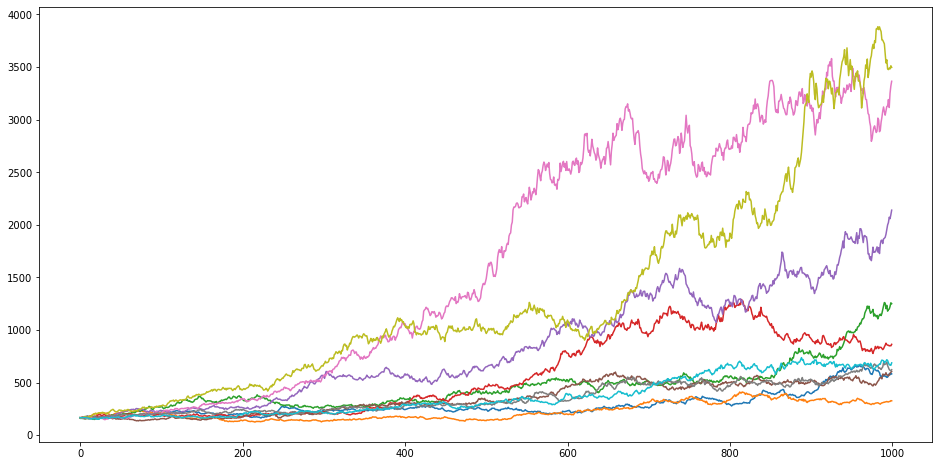

Simulacion accion GOOGL


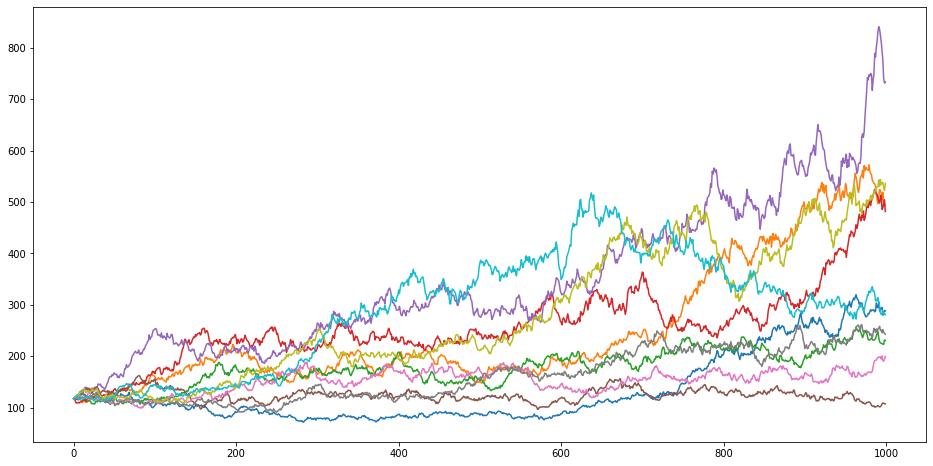

Simulacion accion META


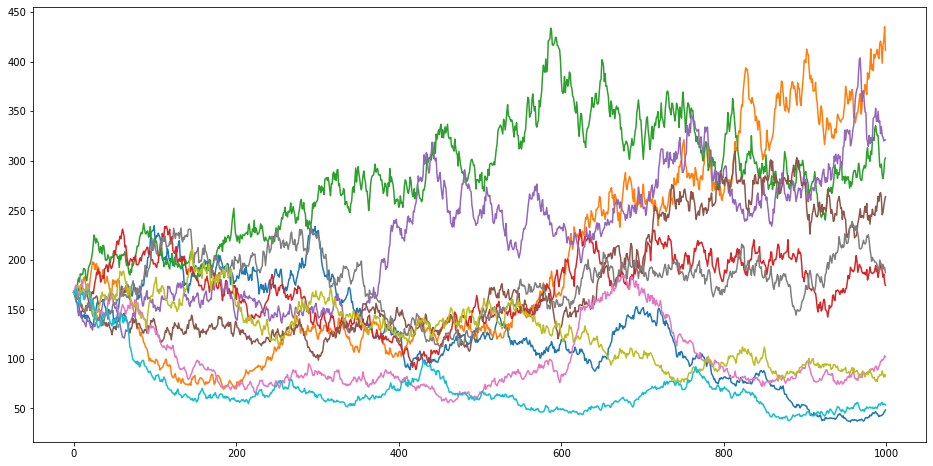

In [160]:
escenarios = 10
pasos = 1000


act=['AAPL', 'GOOGL', 'META']

for p in act:
  rLog=datos[p].pct_change()
  u=rLog.mean()
  var=rLog.var()
  tendencia=u-(0.5*var)
  desv=rLog.std()
  retornosDiarios=np.exp(tendencia + desv * norm.ppf(np.random.rand(pasos, escenarios)))
  listaPrecios = np.zeros_like(retornosDiarios)
  listaPrecios[0] = datos[p].iloc[-1]
  for t in range(1, pasos):
    listaPrecios[t] = listaPrecios[t - 1] * datosEmpresas[p]['simRetornos'][t]
  print(f'Simulacion accion {p}')
  plt.figure(figsize =(16,8))
  plt.plot(listaPrecios)
  plt.show()

